In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
df = pd.read_csv('/content/Data3.csv')


In [ ]:
def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0:
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return ((sum/len(predicted))**0.5)[0]

In [ ]:

# Extract features (first 12 columns) into array x1
x1 = df.iloc[:, :12].values

# Convert x1 array to DataFrame z1 for clarity
z1 = pd.DataFrame(x1)

# Extract target (13th column) into array y1
y1 = df.iloc[:, 12:13].values

# Convert y1 array to DataFrame z2 for clarity
z2 = pd.DataFrame(y1)

# Initialize One-Hot Encoder
ohe = OneHotEncoder()

# One-Hot Encode 'state' column (index 0 of x1) and convert to DataFrame
x_new1 = pd.DataFrame(ohe.fit_transform(x1[:, [0]]).toarray())  # state

# One-Hot Encode 'city' column (index 1 of x1) and convert to DataFrame
x_new2 = pd.DataFrame(ohe.fit_transform(x1[:, [1]]).toarray())  # city

# One-Hot Encode 'station' column (index 2 of x1) and convert to DataFrame
x_new3 = pd.DataFrame(ohe.fit_transform(x1[:, [2]]).toarray())  # station

# Concatenate encoded columns and numerical columns (5 to 11 of x1) into feature set DataFrame
feature_set = pd.concat([x_new1, x_new2, x_new3, pd.DataFrame(x1[:, 5:12])], axis=1, sort=False)

# Split feature_set and y1 into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(feature_set, y1, test_size=0.25, random_state=0)


In [ ]:
# Initialize a Linear Regression model
linear_reg_model = LinearRegression()

# Train the model using the training data
linear_reg_model.fit(x_train, y_train)

# Predict using the trained model on the test data
y_pred = linear_reg_model.predict(x_test)


In [ ]:
mlr_y_predict = linear_reg_model.predict(x_test)
# Calculate Root Mean Squared Error (RMSE)
rmse_mlr = sqrt(metrics.mean_squared_error(y_test, mlr_y_predict))

# Calculate Mean Absolute Error (MAE)
mae_mlr = metrics.mean_absolute_error(y_test, mlr_y_predict)

# Calculate R-squared
r2_mlr = metrics.r2_score(y_test, mlr_y_predict)

# Calculate Root Mean Squared Logarithmic Error (RMSLE)
rmsle_mlr = rmsle(y_test, mlr_y_predict)  # Assuming rmsle is a custom function

# Print error metrics for the MLR model on the test data
print(f"Error Metrics for Test data (MLR):\n rmse_mlr: {rmse_mlr} \n mae_mlr: {mae_mlr}\n r2_mlr: {r2_mlr}\n rmsle_mlr: {rmsle_mlr}")


Error Metrics for Test data (MLR):
 rmse_mlr: 5.4973904965095235 
 mae_mlr: 3.4796476675843704
 r2_mlr: 0.9965384977879443
 rmsle_mlr: 0.05179782796087796


In [ ]:
# Initialize PolynomialFeatures with degree 2
poly_features = PolynomialFeatures(degree=2)

# Initialize Linear Regression model
poly_reg_model = LinearRegression()

# Transform training features to polynomial features
poly_features_train = poly_features.fit_transform(x_train)

# Train the Polynomial Regression model using transformed features and y_train
poly_reg_model.fit(poly_features_train, y_train)

# Predict using the trained Polynomial Regression model on the test data
y_pred_poly = poly_reg_model.predict(poly_features.transform(x_test))

In [ ]:

# Calculate Root Mean Squared Error (RMSE) for Polynomial Regression (PR)
rmse_pr = sqrt(mean_squared_error(y_test, y_pred_poly))

# Calculate Mean Absolute Error (MAE) for Polynomial Regression (PR)
mae_pr = mean_absolute_error(y_test, y_pred_poly)

# Calculate R-squared (R2 Score) for Polynomial Regression (PR)
r2_pr = r2_score(y_test, y_pred_poly)

# Assuming rmsle is a custom function for Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

# Calculate Root Mean Squared Logarithmic Error (RMSLE) for Polynomial Regression (PR)
rmsle_pr = rmsle(y_test, y_pred_poly)

# Print error metrics for the PR model on the test data
print(f"Error Metrics for Test data (PR):\n rmse_pr: {rmse_pr} \n mae_pr: {mae_pr}\n r2_pr: {r2_pr}\n rmsle_pr: {rmsle_pr}")


In [ ]:
# Initialize Decision Tree Regressor with random_state 0
decision_tree = DecisionTreeRegressor(random_state=0)

# Train the Decision Tree model using the training data
decision_tree.fit(x_train, y_train)

# Predict using the trained Decision Tree model on the test data
y_pred_dt = decision_tree.predict(x_test)



In [ ]:

# Calculate Root Mean Squared Error (RMSE) for Decision Tree (DT)
rmse_dt = sqrt(mean_squared_error(y_test, y_pred_dt))

# Calculate Mean Absolute Error (MAE) for Decision Tree (DT)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate R-squared (R2 Score) for Decision Tree (DT)
r2_dt = r2_score(y_test, y_pred_dt)


# Calculate Root Mean Squared Logarithmic Error (RMSLE) for Decision Tree (DT)
rmsle_dt = rmsle(y_test, y_pred_dt)  # Assuming rmsle is a custom function

# Print error metrics for the DT model on the test data
print(f"Error Metrics for Test data (DT):\n rmse_dt: {rmse_dt} \n mae_dt: {mae_dt}\n r2_dt: {r2_dt}\n rmsle_dt: {rmsle_dt}")


In [ ]:

# Convert y_train to a 1-dimensional array if needed
y_train = np.ravel(y_train)

# Initialize Random Forest Regressor with 500 estimators and random_state 0
random_forest = RandomForestRegressor(n_estimators=500, random_state=0)

# Train the Random Forest model using the training data
random_forest.fit(x_train, y_train)

# Predict using the trained Random Forest model on the test data
y_pred_rf = random_forest.predict(x_test)


In [ ]:


# Calculate Root Mean Squared Error (RMSE) for Random Forest Regressor (RF)
rmse_rf = sqrt(mean_squared_error(y_test, y_pred_rf))

# Calculate Mean Absolute Error (MAE) for Random Forest Regressor (RF)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate R-squared (R2 Score) for Random Forest Regressor (RF)
r2_rf = r2_score(y_test, y_pred_rf)

# Assuming rmsle is a custom function, define it if not already defined
def rmsle(y_true, y_pred):
    # Implement your RMSLE calculation here
    pass

# Calculate Root Mean Squared Logarithmic Error (RMSLE) for Random Forest Regressor (RF)
rmsle_rf = rmsle(y_test, y_pred_rf)

# Print error metrics for the Random Forest Regressor on the test data
print(f"Error Metrics for Test data:\n rmse_rf: {rmse_rf} \n mae_rf: {mae_rf}\n r2_rf: {r2_rf}\n rmsle_rf: {rmsle_rf}")


In [ ]:
# Initialize Standard Scaler for features and target
scaler_x = StandardScaler()
scaler_y = StandardScaler()

# Standardize the training features (x_train) and reshape y_train for SVR
x_train_svr = scaler_x.fit_transform(x_train)
y_train_svr = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Initialize Support Vector Regressor (SVR) with RBF kernel
svr_regressor = SVR(kernel='rbf')

# Train the SVR model using standardized data
svr_regressor.fit(x_train_svr, y_train_svr)

# Predict using the trained SVR model on the standardized test data, then inverse transform
svr_y_predict = scaler_y.inverse_transform(svr_regressor.predict(scaler_x.transform(x_test)).reshape(1, -1))


In [ ]:

# Calculate Root Mean Squared Error (RMSE) for SVR
rmse_svr = sqrt(mean_squared_error(y_test, svr_y_predict.T))

# Calculate Mean Absolute Error (MAE) for SVR
mae_svr = mean_absolute_error(y_test, svr_y_predict.T)

# Calculate R-squared (R2 Score) for SVR
r2_svr = r2_score(y_test, svr_y_predict.T)

# Assuming rmsle is a custom function, define it if not already defined
def rmsle(y_true, y_pred):
    # Implement your RMSLE calculation here
    pass

# Calculate Root Mean Squared Logarithmic Error (RMSLE) for SVR
rmsle_svr = rmsle(y_test, svr_y_predict.T)

# Print error metrics for the SVR model on the test data
print(f"Error Metrics for Test data:\n rmse_svr: {rmse_svr} \n mae_svr: {mae_svr}\n r2_svr: {r2_svr}\n rmsle_svr: {rmsle_svr}")

# Calculate Mean Absolute Error (MAE) for SVR
mae_svr = mean_absolute_error(y_test, svr_y_predict.T)

# Calculate R-squared (R2 Score) for SVR
r2_svr = r2_score(y_test, svr_y_predict.T)

# Calculate Root Mean Squared Logarithmic Error (RMSLE) for SVR
rmsle_svr = rmsle(y_test, svr_y_predict.T)  # Assuming rmsle is a custom function
# Print error metrics for the SVR model on the test data
print(f"Error Metrics for Test data:\n rmse_svr: {rmse_svr} \n mae_svr: {mae_svr}\n r2_svr: {r2_svr}\n rmsle_svr: {rmsle_svr}")

# Calculate and print the root mean squared logarithmic error (RMSLE)
rmsle_svr = rmsle(y_test, svr_y_predict.T)
print(f"rmsle_svr: {rmsle_svr}")

print(f"Error Metrics for Test data:\n rmse_svr: {rmse_svr} \n mae_svr: {mae_svr}\n r2_svr: {r2_svr}\n rmsle_svr: {rmsle_svr}")

In [ ]:

# Printing the evaluation on testing data
print("evaluating on testing data:")
print("----------------------------------------")
print("models\tR^2\tRMSE\tMAE\tRMSLE")

# Printing metrics for each model
print("MLR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_mlr, rmse_mlr, mae_mlr, rmsle_mlr))
print("PR\t{0:.2f}\t{1:.2f}\t{2:.3f}\t{3:.4f}".format(r2_pr, rmse_pr, mae_pr, rmsle_pr))
print("DTR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_dt, rmse_dt, mae_dt, rmsle_dt))

# Check and print RFR metrics
if r2_rf is not None and rmse_rf is not None and mae_rf is not None:
    print("RFR\t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_rf, rmse_rf, mae_rf))
else:
    print("RFR metrics not available.")

# Check and print SVR metrics
if r2_svr is not None and rmse_svr is not None and mae_svr is not None:
    print("SVR\t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_svr, rmse_svr, mae_svr))
else:
    print("SVR metrics not available.")


evaluating on testing data:
----------------------------------------
models	R^2	RMSE	MAE	RMSLE


NameError: name 'r2_mlr' is not defined

In [ ]:
import matplotlib.pyplot as plt

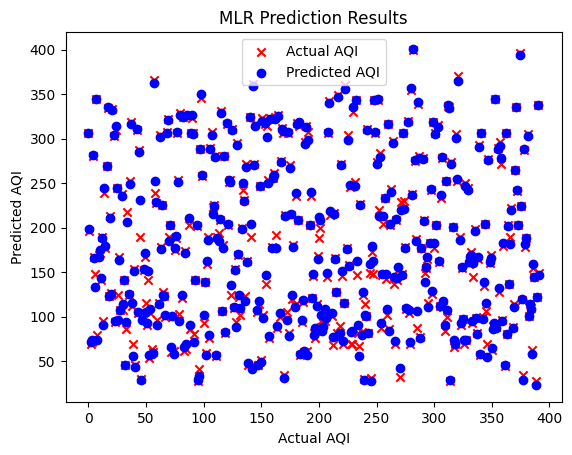

In [ ]:
plt.scatter(range(len(y_test)), y_test, c='red', marker='x', label='Actual AQI')
plt.scatter(range(len(mlr_y_predict)), mlr_y_predict, c='blue', marker='o', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('MLR Prediction Results')
plt.legend()
plt.show()

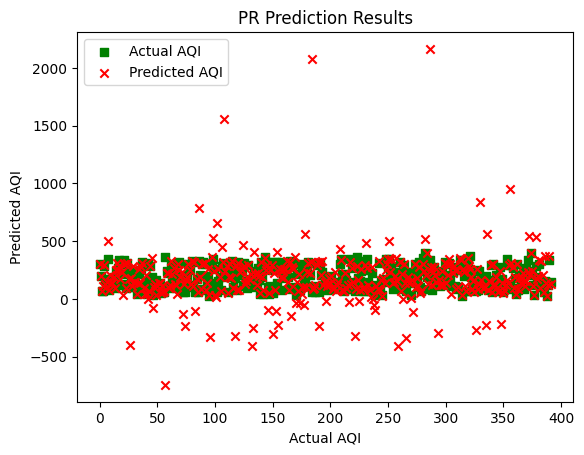

In [ ]:
plt.scatter(range(len(y_test)), y_test, c='green', marker='s', label='Actual AQI')
plt.scatter(range(len(y_pred_poly)), y_pred_poly, c='red', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('PR Prediction Results')
plt.legend()
plt.show()

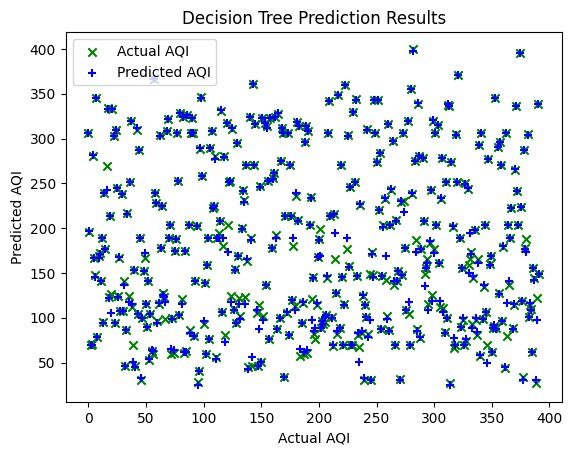

In [ ]:
plt.scatter(range(len(y_test)), y_test, c='green', marker='x', label='Actual AQI')
plt.scatter(range(len(y_pred_dt)), y_pred_dt, c='blue', marker='+', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Decision Tree Prediction Results')
plt.legend()
plt.show()

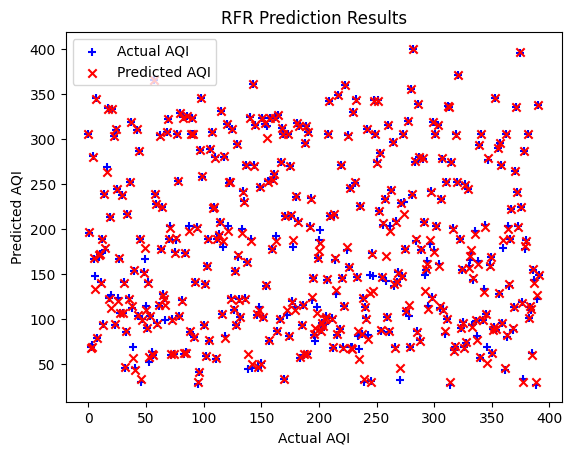

In [ ]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(y_pred_rf)), y_pred_rf, c='red', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('RFR Prediction Results')
plt.legend()
plt.show()

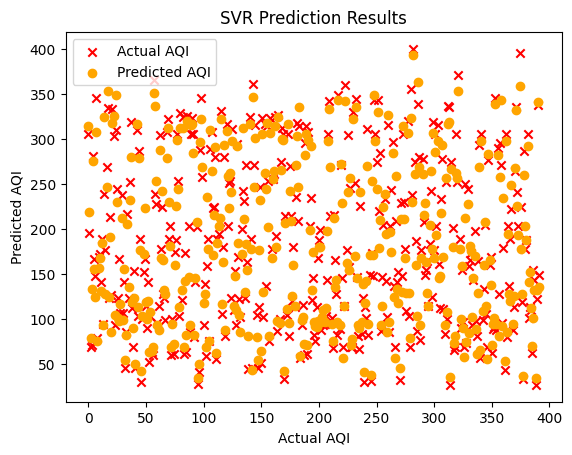

In [ ]:
plt.scatter(range(len(y_test)), y_test, c='red', marker='x', label='Actual AQI')
plt.scatter(range(len(svr_y_predict.T)), svr_y_predict.T, c='orange', marker='o', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('SVR Prediction Results')
plt.legend()
plt.show()